In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# loading the dataset
df = pd.read_csv(r'C:\Project_files\churn_dataset.csv')

## Data Analysis


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# finding the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [8]:
# changing the dtypes of correpted data
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')
df.SeniorCitizen = df.SeniorCitizen.astype('str')

In [9]:
df.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

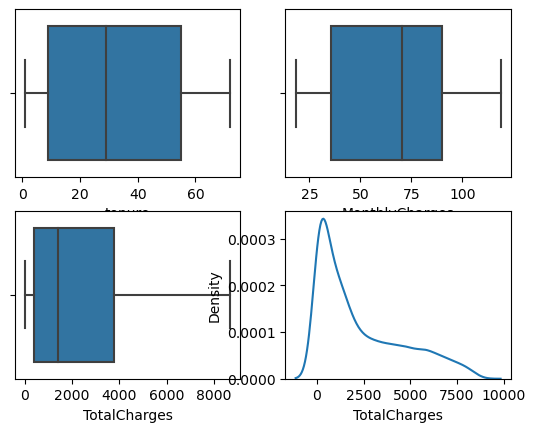

In [10]:
plt.subplot(221)
sns.boxplot(df.tenure)
plt.subplot(222)
sns.boxplot(df.MonthlyCharges)
plt.subplot(223)
sns.boxplot(df.TotalCharges)
plt.subplot(224)
sns.kdeplot(df.TotalCharges)

In [11]:
# removing the outlayers 
q1,q2,q3  = df.TotalCharges.quantile([0.25,0.5,0.75])
iqr = q3-q1
ll = q1- 1.5*iqr
ul = q3+ 1.5*iqr
df = df[df.TotalCharges.between(ll,ul)]

In [12]:
df.duplicated().sum() # no duplicates 

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

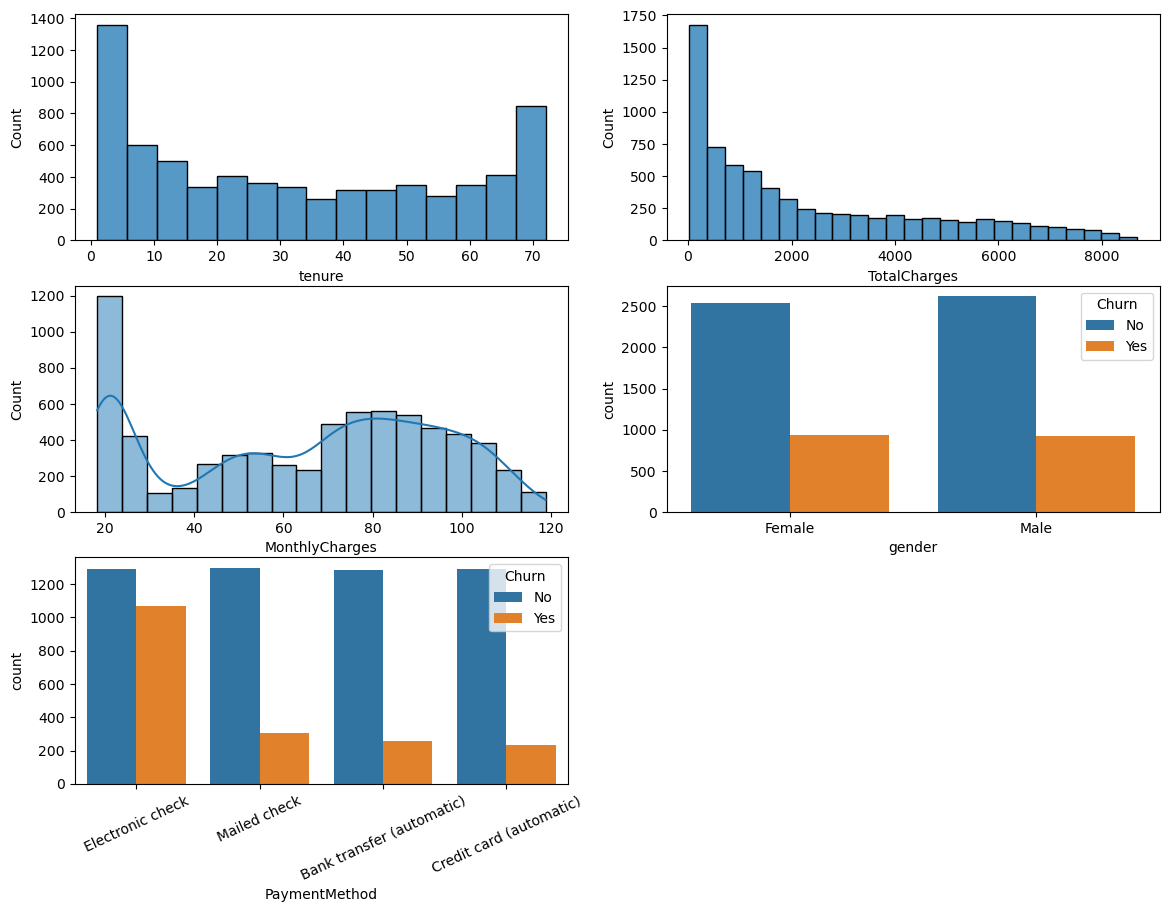

In [13]:
plt.figure(figsize= (14,10))
plt.subplot(321)
sns.histplot(df.tenure)
plt.subplot(322)
sns.histplot(df.TotalCharges)
plt.subplot(323)
sns.histplot(df.MonthlyCharges,kde= True)
plt.subplot(324)
sns.countplot(df.gender,hue= df.Churn)
plt.subplot(325)
sns.countplot(df.PaymentMethod,hue= df.Churn)
plt.xticks(rotation = 25)


### conclusion 
    most people are trying to churn earlier ,if the people who don't  churn in earlier days they stay long time 
    most of the people paying 20 and 70-90 monthly charges,and 100-700 total charges 
    the churn ratio of both male and female are almost same males are slightly have high vhurn ratio
    the person who pay their bill in electronic check method have high possibility to churn

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.to_csv(r'C:\Project_files\churn_dataset_cleaned.csv')

In [16]:
# segrigate the input and output
X = df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService',
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
    'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]
y = df.Churn

In [17]:
# splitting the train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4922, 19) (2110, 19)
(4922,) (2110,)


In [18]:
# segrigating the dtypes of train data
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_cat = X_train.select_dtypes(include='object')

In [19]:
# transforming the X_train catagorical and numerical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop = 'first',sparse = False)
X_train_cat_trans = pd.DataFrame(encoder.fit_transform(X_train_cat),
                                columns=encoder.get_feature_names_out(X_train_cat.columns),
                                index = X_train_cat.index)
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_num_trans = pd.DataFrame(scalar.fit_transform(X_train_num),
                                columns=X_train_num.columns,
                                index = X_train_num.index)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
# concating transformed datasets
X_train_trans = pd.concat([X_train_num_trans,X_train_cat_trans],axis=1)

In [21]:

# segrigating the dtypes of test data
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_cat = X_test.select_dtypes(include='object')
# transforming the X_test catagorical and numerical data

X_test_cat_trans = pd.DataFrame(encoder.transform(X_test_cat),
                                columns=encoder.get_feature_names_out(X_test_cat.columns),
                                index = X_test_cat.index)
X_test_num_trans = pd.DataFrame(scalar.transform(X_test_num),
                                columns=X_test_num.columns,
                                index = X_test_num.index)
# concating the test dataset
X_test_trans = pd.concat([X_test_num_trans,X_test_cat_trans],axis=1)

## Training

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_trans,y_train)

LogisticRegression()

In [23]:
y_test_pre = classifier.predict(X_test_trans)

In [24]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pre)

0.7985781990521327

In [25]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.7981042654028436

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.7203791469194313

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.7853080568720379

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.7985781990521327

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.7649289099526067

In [30]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train_trans,y_train)
y_test_pre = classifier.predict(X_test_trans)
metrics.accuracy_score(y_test,y_test_pre)

0.8033175355450237

### conclusion
`AdaBoostClassifier` is best best model for the churn dataset